## Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

In [3]:
# Import Dataset
crime=pd.read_csv('crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime2=crime.drop(['Unnamed: 0'],axis=1)
crime2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [11]:
# Normalize heterogenous numerical data 
crime2_norm=pd.DataFrame(StandardScaler().fit_transform(crime2),columns=crime2.columns)
crime2_norm

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


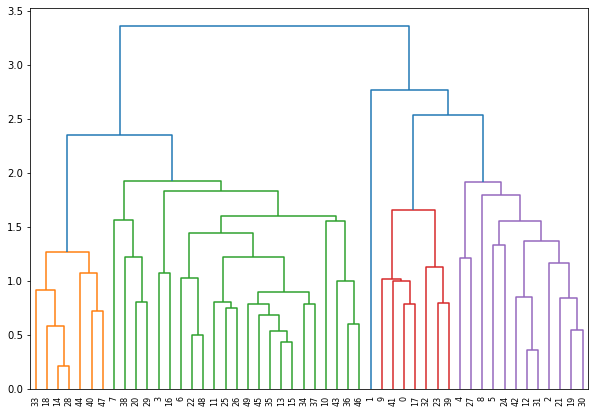

In [12]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(crime2_norm,'average'))

In [24]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')
hclusters

AgglomerativeClustering(linkage='average', n_clusters=4)

In [25]:
y=pd.DataFrame(hclusters.fit_predict(crime2_norm),columns=['clustersid'])
y['clustersid'].value_counts()

0    30
1    12
3     7
2     1
Name: clustersid, dtype: int64

In [26]:
# Adding clusters to dataset
crime2['clustersid_hier']=hclusters.labels_
crime2

,Murder,Assault,UrbanPop,Rape,clustersid_hier
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,3


In [27]:
crime2.groupby('clustersid_hier').agg(['mean']).reset_index()

,clustersid_hier,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.870000,114.433333,63.633333,15.943333
1,1,10.883333,256.916667,78.333333,32.250000
2,2,10.000000,263.000000,48.000000,44.500000
3,3,14.671429,251.285714,54.285714,21.685714


In [28]:
from sklearn.cluster import KMeans

In [29]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

C:\Users\Sharda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


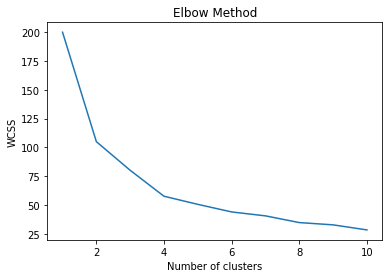

In [30]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(crime2_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Using Elbow curve, we can go for 4 clusters

In [31]:
#Build Cluster algorithm
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(crime2_norm)

KMeans(n_clusters=4, random_state=42)

In [32]:
clusters_new.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [33]:
#Assign clusters to the data set
crime2['clustersid_kmeans']=clusters_new.labels_
crime2

,Murder,Assault,UrbanPop,Rape,clustersid_hier,clustersid_kmeans
0,13.2,236,58,21.2,3,1
1,10.0,263,48,44.5,2,2
2,8.1,294,80,31.0,1,2
3,8.8,190,50,19.5,0,1
4,9.0,276,91,40.6,1,2
5,7.9,204,78,38.7,1,2
6,3.3,110,77,11.1,0,0
7,5.9,238,72,15.8,0,0
8,15.4,335,80,31.9,1,2
9,17.4,211,60,25.8,3,1


In [37]:
crime2.groupby('clustersid_kmeans').agg(['mean']).reset_index()

,clustersid_kmeans,Murder,Assault,UrbanPop,Rape,clustersid_hier
,,mean,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250,0.000000
1,1,13.937500,243.625000,53.750000,21.412500,2.625000
2,2,10.815385,257.384615,76.000000,33.192308,1.076923
3,3,3.600000,78.538462,52.076923,12.176923,0.000000


In [38]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [39]:
array=crime2.values
array

array([[ 13.2, 236. ,  58. ,  21.2,   3. ,   1. ],
       [ 10. , 263. ,  48. ,  44.5,   2. ,   2. ],
       [  8.1, 294. ,  80. ,  31. ,   1. ,   2. ],
       [  8.8, 190. ,  50. ,  19.5,   0. ,   1. ],
       [  9. , 276. ,  91. ,  40.6,   1. ,   2. ],
       [  7.9, 204. ,  78. ,  38.7,   1. ,   2. ],
       [  3.3, 110. ,  77. ,  11.1,   0. ,   0. ],
       [  5.9, 238. ,  72. ,  15.8,   0. ,   0. ],
       [ 15.4, 335. ,  80. ,  31.9,   1. ,   2. ],
       [ 17.4, 211. ,  60. ,  25.8,   3. ,   1. ],
       [  5.3,  46. ,  83. ,  20.2,   0. ,   0. ],
       [  2.6, 120. ,  54. ,  14.2,   0. ,   3. ],
       [ 10.4, 249. ,  83. ,  24. ,   1. ,   2. ],
       [  7.2, 113. ,  65. ,  21. ,   0. ,   0. ],
       [  2.2,  56. ,  57. ,  11.3,   0. ,   3. ],
       [  6. , 115. ,  66. ,  18. ,   0. ,   0. ],
       [  9.7, 109. ,  52. ,  16.3,   0. ,   3. ],
       [ 15.4, 249. ,  66. ,  22.2,   3. ,   1. ],
       [  2.1,  83. ,  51. ,   7.8,   0. ,   3. ],
       [ 11.3, 300. ,  67. ,  2

In [40]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  2.20300046,
        -0.38760987],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  1.24517417,
         0.45502028],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  0.28734789,
         0.45502028],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.6704784 ,
        -0.38760987],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  0.28734789,
         0.45502028],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  0.28734789,
         0.45502028],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.6704784 ,
        -1.23024001],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.6704784 ,
        -1.23024001],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  0.28734789,
         0.45502028],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  2.20300046,
        -0.38760987],
       [-0.57702994, -1.51224105,  1.21848371, -0.

In [50]:
dbscan = DBSCAN(eps=2, min_samples=10)
dbscan.fit(X)

DBSCAN(eps=2, min_samples=10)

In [42]:
#Noisy samples are given the label -1.
dbscan.labels_

array([-1, -1,  0,  1,  0,  0,  1,  1,  0, -1,  1,  2,  0,  1,  2,  1,  2,
       -1,  2,  0,  1,  0,  2, -1,  0,  2,  2,  0,  2,  1,  0,  0, -1,  2,
        1,  1,  1,  1,  1, -1,  2, -1,  0,  1,  2,  1,  1,  2,  2,  1],
      dtype=int64)

In [51]:
crime2['clustersid_DBSCAN']=dbscan.labels_
crime2

,Murder,Assault,UrbanPop,Rape,clustersid_hier,clustersid_kmeans,clustersid_DBSCAN
0,13.2,236,58,21.2,3,1,-1
1,10.0,263,48,44.5,2,2,-1
2,8.1,294,80,31.0,1,2,0
3,8.8,190,50,19.5,0,1,1
4,9.0,276,91,40.6,1,2,0
5,7.9,204,78,38.7,1,2,0
6,3.3,110,77,11.1,0,0,1
7,5.9,238,72,15.8,0,0,1
8,15.4,335,80,31.9,1,2,0
9,17.4,211,60,25.8,3,1,-1


In [52]:
crime2.groupby('clustersid_DBSCAN').agg(['mean']).reset_index()

,clustersid_DBSCAN,Murder,Assault,UrbanPop,Rape,clustersid_hier,clustersid_kmeans
,,mean,mean,mean,mean,mean,mean
0,-1,14.087500,252.750000,53.500000,24.537500,2.875,1.125000
1,0,10.883333,256.916667,78.333333,32.250000,1.000,2.000000
2,1,5.841176,141.882353,72.470588,18.823529,0.000,0.058824
3,2,3.600000,78.538462,52.076923,12.176923,0.000,3.000000
